In [1]:
import os, sys, glob, json, scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)
import GWGen
from GWGen.WFGenerator import *

In [6]:
foldpath = os.getcwd()+"/Data/Output/"
filenames = glob.glob(foldpath+"*.json")
data = []
for file in filenames:
    with open(file, "r") as f:
        data.append(json.load(f))
data[-1]
datframe = pd.DataFrame(data)
datframe

,SMBHMASS,SecondaryMass,PROCAMASS,p0,e0,BHSpin,Trajectory Exit Reason,mismatch,faithfulness,DeltaNOrbits
0,1000000.0,10,3.000000e-18,11.10,0.1,0.63,Separatrix reached!,3.730349e-14,1.000000,4.632018e-10
1,1000000.0,10,3.000000e-18,11.05,0.2,0.63,Separatrix reached!,-2.664535e-14,1.000000,6.299545e-10
2,1000000.0,10,9.000000e-18,11.10,0.1,0.66,Separatrix reached!,1.153042e-03,0.997284,1.931133e-03
3,1000000.0,10,9.000000e-18,11.05,0.2,0.66,Separatrix reached!,1.238406e-03,0.997114,1.837006e-03
4,1000000.0,10,6.000000e-18,11.10,0.1,0.73,Separatrix reached!,3.158061e-08,1.000000,9.282676e-06
...,...,...,...,...,...,...,...,...,...,...
80,500000.0,10,4.000000e-17,15.55,0.2,0.83,Separatrix reached!,9.954952e-01,0.001006,6.073314e+02
81,500000.0,10,1.000000e-17,15.60,0.1,0.90,Separatrix reached!,1.409391e-08,1.000000,6.112597e-06
82,500000.0,10,1.000000e-17,15.55,0.2,0.90,Separatrix reached!,1.420337e-08,1.000000,6.101702e-06
83,600000.0,10,5.000000e-18,14.70,0.1,0.66,Separatrix reached!,2.220446e-15,1.000000,1.259909e-09


In [34]:
BHMasses = np.asarray([data[i]["SMBHMASS"] for i in range(len(data))])
ProcaMasses = np.asarray([data[i]["PROCAMASS"] for i in range(len(data))])
Faith = np.asarray([data[i]["faithfulness"] for i in range(len(data))])

interps = []
bhmasses = []
newpran = []
out = {}
for inx, b in enumerate(BHMasses):
    pmass = ProcaMasses[BHMasses==b]
    sorter = np.argsort(pmass)
    pmass = pmass[sorter]
    faith = Faith[BHMasses==b][sorter]
    if len(faith)<2:
        continue
    bhmasses.append(b)
    out[str(b)]=(pmass, faith)
    interps.append(sp.interpolate.interp1d(pmass, faith, bounds_error=False))

In [35]:
xdat = []
ydat = []
zdat = []
for inx, b in enumerate(bhmasses):
    for inx1, p in enumerate(np.arange(min(ProcaMasses), max(ProcaMasses), 1e-18)):
        xdat.append(b)
        ydat.append(p)
        zdat.append(interps[inx](p))

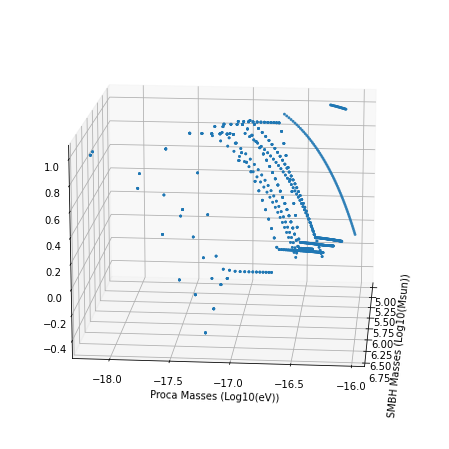

In [36]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(np.log10(xdat), np.log10(ydat), zdat,s=3)
ax.set_ylabel("Proca Masses (Log10(eV))")
ax.set_xlabel("SMBH Masses (Log10(Msun))")
ax.view_init(15,5)